LET'S TRY PCA TO REDUCE DIMENSION THEN PERFORME OUR CLUSTERING ( MAYBE USING KMEANS INSTEAD !!)

In [ ]:
!pip install tsne

     |████████████████████████████████| 552kB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp36-cp36m-linux_x86_64.whl size=260986 sha256=54c26577f29240442b73eb93f7ada046497e0e91e4d9ce84183dd4177b14fde9
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from PIL import Image
import glob
import cv2
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE
import seaborn as sns
from tsne import bh_sne
import matplotlib.patheffects as PathEffects
from tqdm import tqdm
from skimage import feature

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
r,c=405,397

In [ ]:
path = "/content/drive/My Drive/analysis_result/*.*"

def resize_img(path):
    matrix=[]
    index=[]
    for file in glob.glob(path):
        index.append(file)
        img=cv2.imread(file)
        pixels = img.reshape(img.shape[0]*img.shape[1]*img.shape[2])

        matrix.append(pixels)
    
    return matrix

In [ ]:
resizeimaged=resize_img(path)
X=np.asarray(resizeimaged)
X.shape

(189, 482355)

In [ ]:
Clus_dataSet = StandardScaler().fit_transform(X) #(mean = 0 and variance = 1)


In [ ]:
variance = 0.98 #The higher the explained variance the more accurate the model will remain, but more dimensions will be present
pca = PCA(variance)

pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=0.98, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print("Number of components before PCA  = " + str(X.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_)) 
#dimension reduced from 784

Number of components before PCA  = 482355
Number of components after PCA 0.98 = 168


In [ ]:
Clus_dataSet = pca.transform(X)
print("Dimension of our data after PCA = " + str(Clus_dataSet.shape))


Dimension of our data after PCA = (189, 168)


In [ ]:
clustering = SpectralClustering(assign_labels="discretize",random_state=0).fit(Clus_dataSet)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
clustrs=clustering.labels_

In [ ]:
#numbre of images in every cluster
np.bincount(clustrs)

array([25, 35, 17, 24, 18, 29, 20, 21])

In [ ]:
tsnee = TSNE(random_state=101).fit_transform(resizeimaged)


In [ ]:
vis_data=tsnee

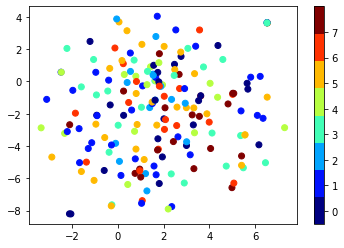

In [ ]:
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
plt.scatter(vis_x, vis_y, c=clustrs, cmap=plt.cm.get_cmap("jet", 8))
plt.colorbar(ticks=range(8))
plt.clim(-0.5, 8)
plt.show()

applying kmeans instead !

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 7, n_init = 35,random_state=0)
k_means.fit(Clus_dataSet)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=35, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
classes=k_means.labels_

In [ ]:
np.bincount(classes)

array([ 70,  11,   1,   5,   1, 100,   1])

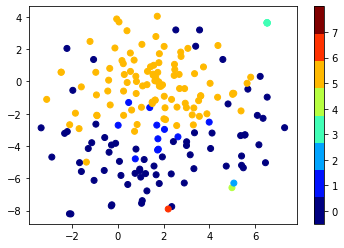

In [ ]:
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
plt.scatter(vis_x, vis_y, c=classes, cmap=plt.cm.get_cmap("jet", 8))
plt.colorbar(ticks=range(8))
plt.clim(-0.5, 8)
plt.show()

# applying Kmeans without using pca

In [ ]:
k_means2 = KMeans(init = "k-means++", n_clusters = 7, n_init = 35,random_state=0)
k_means2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=35, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
classes2=k_means2.labels_
np.bincount(classes2)

array([  1,  52,   1,   7, 122,   1,   5])

In [ ]:
vis_data = TSNE(random_state=101).fit_transform(resizeimaged)


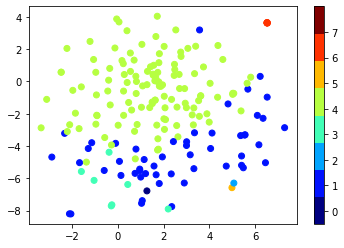

In [ ]:
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
plt.scatter(vis_x, vis_y, c=classes2, cmap=plt.cm.get_cmap("jet", 8))
plt.colorbar(ticks=range(8))
plt.clim(-0.5, 8)
plt.show()

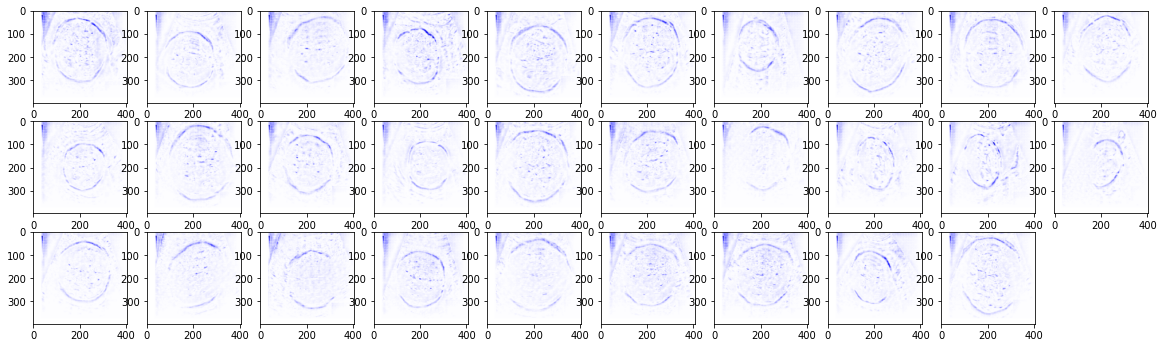

In [ ]:
G = len(np.unique(classes)) #Number of labels
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(classes,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust =0 #enter label number to visualise
num = 30 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i]].reshape((c,r,3)), cmap = plt.cm.binary);
    
    
plt.show()

In [ ]:
#install these if you haven’t
#!pip install chart_studio 
#!pip install plotly
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
#3D Plotly Visualization of Clusters using go
layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)
colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon','teal','black']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,7):
    my_members = (classes == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=Clus_dataSet[my_members, 0],# 0 is a component among the 420 components. Feel free to change it
            y=Clus_dataSet[my_members, 1],# 1 is a component among the 420 components. Feel free to change it
            z=Clus_dataSet[my_members, 2],# 2 is a component among the 420 components. Feel free to change it
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )
fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6]], layout=layout)
    
py.offline.iplot(fig)

In [ ]:
def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))

    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)

    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range

In [ ]:
def scale_image(image, max_image_size):
    image_height, image_width, _ = image.shape

    scale = max(1, image_width / max_image_size, image_height / max_image_size)
    image_width = int(image_width / scale)
    image_height = int(image_height / scale)

    image = cv2.resize(image, (image_width, image_height))
    return image

In [ ]:
def draw_rectangle_by_class(image, label):
    image_height, image_width, _ = image.shape

    # get the color corresponding to image class
    color = colors_per_class[str(label)]
    image = cv2.rectangle(image, (0, 0), (image_width - 1, image_height - 1), color=color, thickness=5)

    return image

In [ ]:
def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape

    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset

    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset

    # knowing the image center, compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)

    br_x = tl_x + image_width
    br_y = tl_y + image_height

    return tl_x, tl_y, br_x, br_y

In [ ]:
def visualize_tsne_images(tx, ty, images, labels, plot_size=1000, max_image_size=100):
    # we'll put the image centers in the central area of the plot
    # and use offsets to make sure the images fit the plot
    offset = max_image_size // 2
    image_centers_area_size = plot_size - 2 * offset

    tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)

    # now we'll put a small copy of every image to its corresponding T-SNE coordinate
    for image_path, label, x, y in tqdm(
            zip(images, labels, tx, ty),
            desc='Building the T-SNE plot',
            total=len(images)
    ):
        image = image_path

        # scale the image to put it to the plot
        image = scale_image(image, max_image_size)

        # draw a rectangle with a color corresponding to the image class
        image = draw_rectangle_by_class(image, label)

        # compute the coordinates of the image on the scaled plot visualization
        tl_x, tl_y, br_x, br_y = compute_plot_coordinates(image, x, y, image_centers_area_size, offset)

        # put the image to its TSNE coordinates using numpy subarray indices
        tsne_plot[tl_y:br_y, tl_x:br_x, :] = image
    plt.figure(figsize=(10,10))
    plt.imshow(tsne_plot[:, :, ::-1])
    plt.show()

In [ ]:
def visualize_tsne_points(tx, ty, labels):
    # initialize matplotlib plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)

    # for every class, we'll add a scatter plot separately
    for label in colors_per_class:
        # find the samples of the current class in the data
        label=int(label)
        indices = [i for i, l in enumerate(labels) if l == label]

        # extract the coordinates of the points of this class only
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)

        # convert the class color to matplotlib format:
        # BGR -> RGB, divide by 255, convert to np.array
        color = np.array([colors_per_class[str(label)][::-1]], dtype=np.float) / 255

        # add a scatter plot with the correponding color and label
        ax.scatter(current_tx, current_ty,color=color,label=label)

    # build a legend using the labels we set previously
    ax.legend(loc='best')

    # finally, show the plot
    plt.show()

In [ ]:
def visualize_tsne(tsne, images, labels, plot_size=1000, max_image_size=100):
    # extract x and y coordinates representing the positions of the images on T-SNE plot
    tx = tsne[:, 0]
    ty = tsne[:, 1]

    # scale and move the coordinates so they fit [0; 1] range
    tx = scale_to_01_range(tx)
    ty = scale_to_01_range(ty)

    # visualize the plot: samples as colored points
    visualize_tsne_points(tx, ty, labels)

    # visualize the plot: samples as images
    visualize_tsne_images(tx, ty, images, labels, plot_size=plot_size, max_image_size=max_image_size)

In [ ]:
def load_only(path):
    matrix=[]
    index=[]
    for file in glob.glob(path):
        index.append(file)
        img=cv2.imread(file)
        matrix.append(img)
    
    return matrix

In [ ]:
loadonly=load_only(path)
loadonly=np.asarray(loadonly)

In [ ]:
image_paths=loadonly
labels=classes2
color_per_class=np.unique(classes2)
#colors_per_class={'0':(100,100,100),'1':(0,0,200),'2':(200,0,0),'3':(100,100,0),'4':(0,255,0),'5':(0,0,255),'6':(0,200,100),'7':(100,0,255)}
colors_per_class={'0':(100,100,100),'1':(0,0,200),'2':(200,0,0),'3':(100,100,0),'4':(0,255,0),'5':(0,0,255),'6':(0,200,100)}

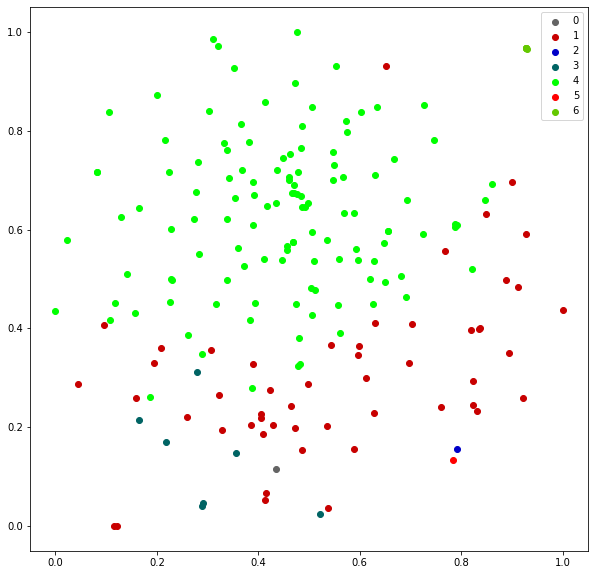

Building the T-SNE plot: 100%|██████████| 189/189 [00:00<00:00, 2738.56it/s]


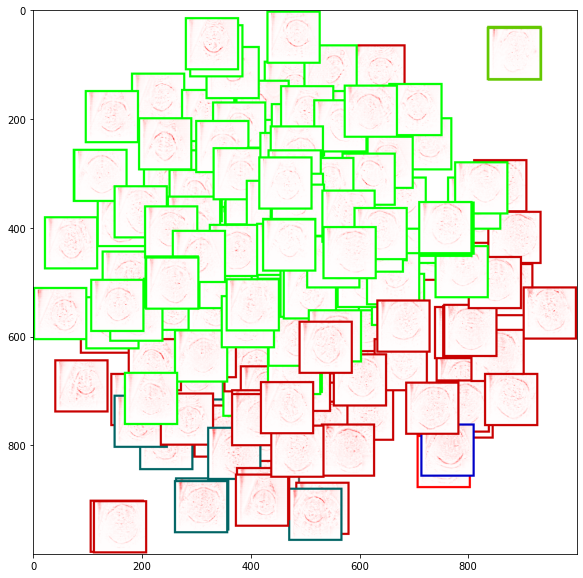

In [ ]:
visualize_tsne(vis_data, image_paths, labels)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/My Drive/test_annotationcv01_128.csv")
diff=df[['hc(px)','diff_resnet']]
diff.head()

,hc(px),diff_resnet
0,947.101418,54.661182
1,1436.142192,2.768608
2,1364.923818,13.881082
3,1339.995104,8.539696
4,981.667824,52.218976


In [ ]:
clusters=pd.Series(classes)

In [ ]:
classperdiff=pd.concat([clusters,diff],axis=1)
classperdiff.shape
classperdiff.head()

,0,hc(px),diff_resnet
0,0,947.101418,54.661182
1,0,1436.142192,2.768608
2,5,1364.923818,13.881082
3,0,1339.995104,8.539696
4,5,981.667824,52.218976


aggregate the error prediction by clusters 

In [ ]:
val0=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==0:
    val0.append(classperdiff.loc[v,'diff_resnet'])

val1=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==1:
    val1.append(classperdiff.loc[v,'diff_resnet'])

val2=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==2:
    val2.append(classperdiff.loc[v,'diff_resnet'])

val3=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==3:
    val3.append(classperdiff.loc[v,'diff_resnet'])

val4=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==4:
    val4.append(classperdiff.loc[v,'diff_resnet'])

val5=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==5:
    val5.append(classperdiff.loc[v,'diff_resnet'])

val6=[]
for v in range(classperdiff['diff_resnet'].shape[0]):

  if classperdiff.loc[v,0]==6:
    val6.append(classperdiff.loc[v,'diff_resnet'])

Text(0.5, 1.0, 'class 6')

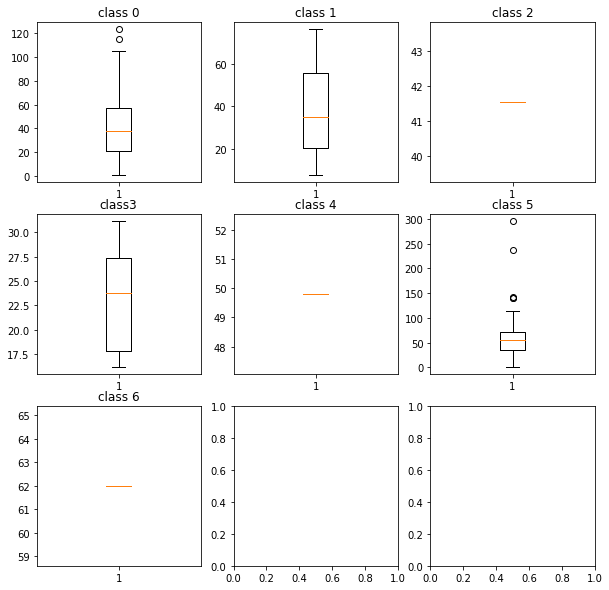

In [ ]:
#boxplots of prediction error for every class
fig,axs=plt.subplots(3,3,figsize=(10,10))
axs[0, 0].boxplot(val0)
axs[0, 0].set_title('class 0')
axs[0, 1].boxplot(val1)
axs[0, 1].set_title('class 1')
axs[0, 2].boxplot(val2)
axs[0, 2].set_title('class 2')
axs[1, 0].boxplot(val3)
axs[1, 0].set_title('class3')
axs[1, 1].boxplot(val4)
axs[1, 1].set_title('class 4')
axs[1, 2].boxplot(val5)
axs[1, 2].set_title('class 5')
axs[2, 0].boxplot(val6)
axs[2, 0].set_title('class 6')

the same as before only this time, we'll use the hc measure

In [ ]:
val0=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==0:
    val0.append(classperdiff.loc[v,'hc(px)'])

val1=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==1:
    val1.append(classperdiff.loc[v,'hc(px)'])

val2=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==2:
    val2.append(classperdiff.loc[v,'hc(px)'])

val3=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==3:
    val3.append(classperdiff.loc[v,'hc(px)'])

val4=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==4:
    val4.append(classperdiff.loc[v,'hc(px)'])

val5=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==5:
    val5.append(classperdiff.loc[v,'hc(px)'])

val6=[]
for v in range(classperdiff['hc(px)'].shape[0]):

  if classperdiff.loc[v,0]==6:
    val6.append(classperdiff.loc[v,'hc(px)'])

Text(0.5, 1.0, 'class 6')

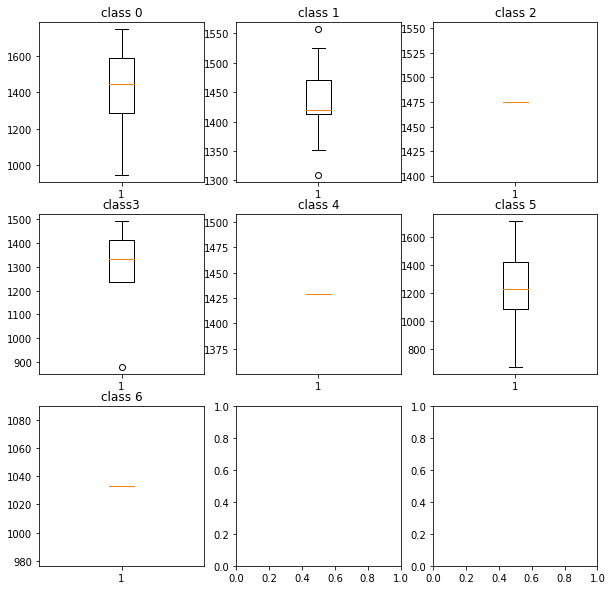

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(10,10))
axs[0, 0].boxplot(val0)
axs[0, 0].set_title('class 0')
axs[0, 1].boxplot(val1)
axs[0, 1].set_title('class 1')
axs[0, 2].boxplot(val2)
axs[0, 2].set_title('class 2')
axs[1, 0].boxplot(val3)
axs[1, 0].set_title('class3')
axs[1, 1].boxplot(val4)
axs[1, 1].set_title('class 4')
axs[1, 2].boxplot(val5)
axs[1, 2].set_title('class 5')
axs[2, 0].boxplot(val6)
axs[2, 0].set_title('class 6')